In [2]:
import numpy as np
import pandas as pd
import scanpy as sc 
import anndata 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.api as sm
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns


In [3]:
adata = sc.read_h5ad("data/Paul15ESC.h5ad")

In [5]:
cl = adata.obs.louvain

erythrocytes = ((cl == '16') | (cl == '12') | (cl == '7') | 
(cl == '13')  | (cl == '18') | (cl == '6') | (cl == '5') | (cl == '10')) 

neutrphiles = ((cl == '16') | (cl == '0') | (cl == '4') | 
               (cl == '2') | (cl == '14') | (cl == '19')) 

monocytes = ((cl == '16') | (cl == '0') | (cl == '4') | 
             (cl == '11') | (cl == '1') | (cl == '9') | (cl == '24'))

In [67]:
adata_sub = adata[neutrphiles]

In [68]:
Metrics = ["I_go", "I_ge", "S", "E", "C"]

corr_genes_metrics_df = pd.DataFrame()
for met in Metrics:    
    metric_value = adata_sub.obs[met].to_numpy()

    corr_vector_per_metric = np.array([])
    for g in range(0,adata_sub.X.shape[1]):
        gene_vector = adata_sub.X[:,g]
        corr_value = np.corrcoef(gene_vector, metric_value)[0,1]
        corr_vector_per_metric = np.append(corr_vector_per_metric,corr_value)
        
    corr_genes_metrics_df[met] = corr_vector_per_metric

/home/balubao/anaconda3/envs/EntropyV2/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/balubao/anaconda3/envs/EntropyV2/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/balubao/anaconda3/envs/EntropyV2/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/balubao/anaconda3/envs/EntropyV2/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/balubao/anaconda3/envs/EntropyV2/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/balubao/anaconda3/envs/EntropyV2/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: inv

In [69]:
corr_genes_metrics_df.index = adata_sub.var.index

In [70]:
top_100_genes = corr_genes_metrics_df.sort_values(by= ["I_go"], ascending=False).head(40)
gene_names = top_100_genes.index.tolist()
GSEA_results = sc.queries.enrich(gene_names, org="mmusculus")

In [83]:
top_100_genes

,I_go,I_ge,S,E,C
H2afy,0.265572,0.171942,-0.119105,0.232540,0.275161
Cd34,0.250466,0.169906,-0.106106,0.217622,0.260619
Top2a,0.234674,0.392315,0.087941,0.131857,0.305209
Actb,0.215813,0.214409,-0.036768,0.167339,0.243980
Arl6ip1,0.214201,0.253418,-0.003854,0.152999,0.250210
Mki67,0.208815,0.290367,0.031059,0.135453,0.255389
Zyx,0.204655,0.129079,-0.094535,0.180471,0.210357
Gpr56,0.201972,0.085844,-0.126684,0.190695,0.199808
Cux1,0.201023,0.115560,-0.101882,0.180360,0.203339
Sell,0.199919,0.166199,-0.060115,0.163482,0.216748


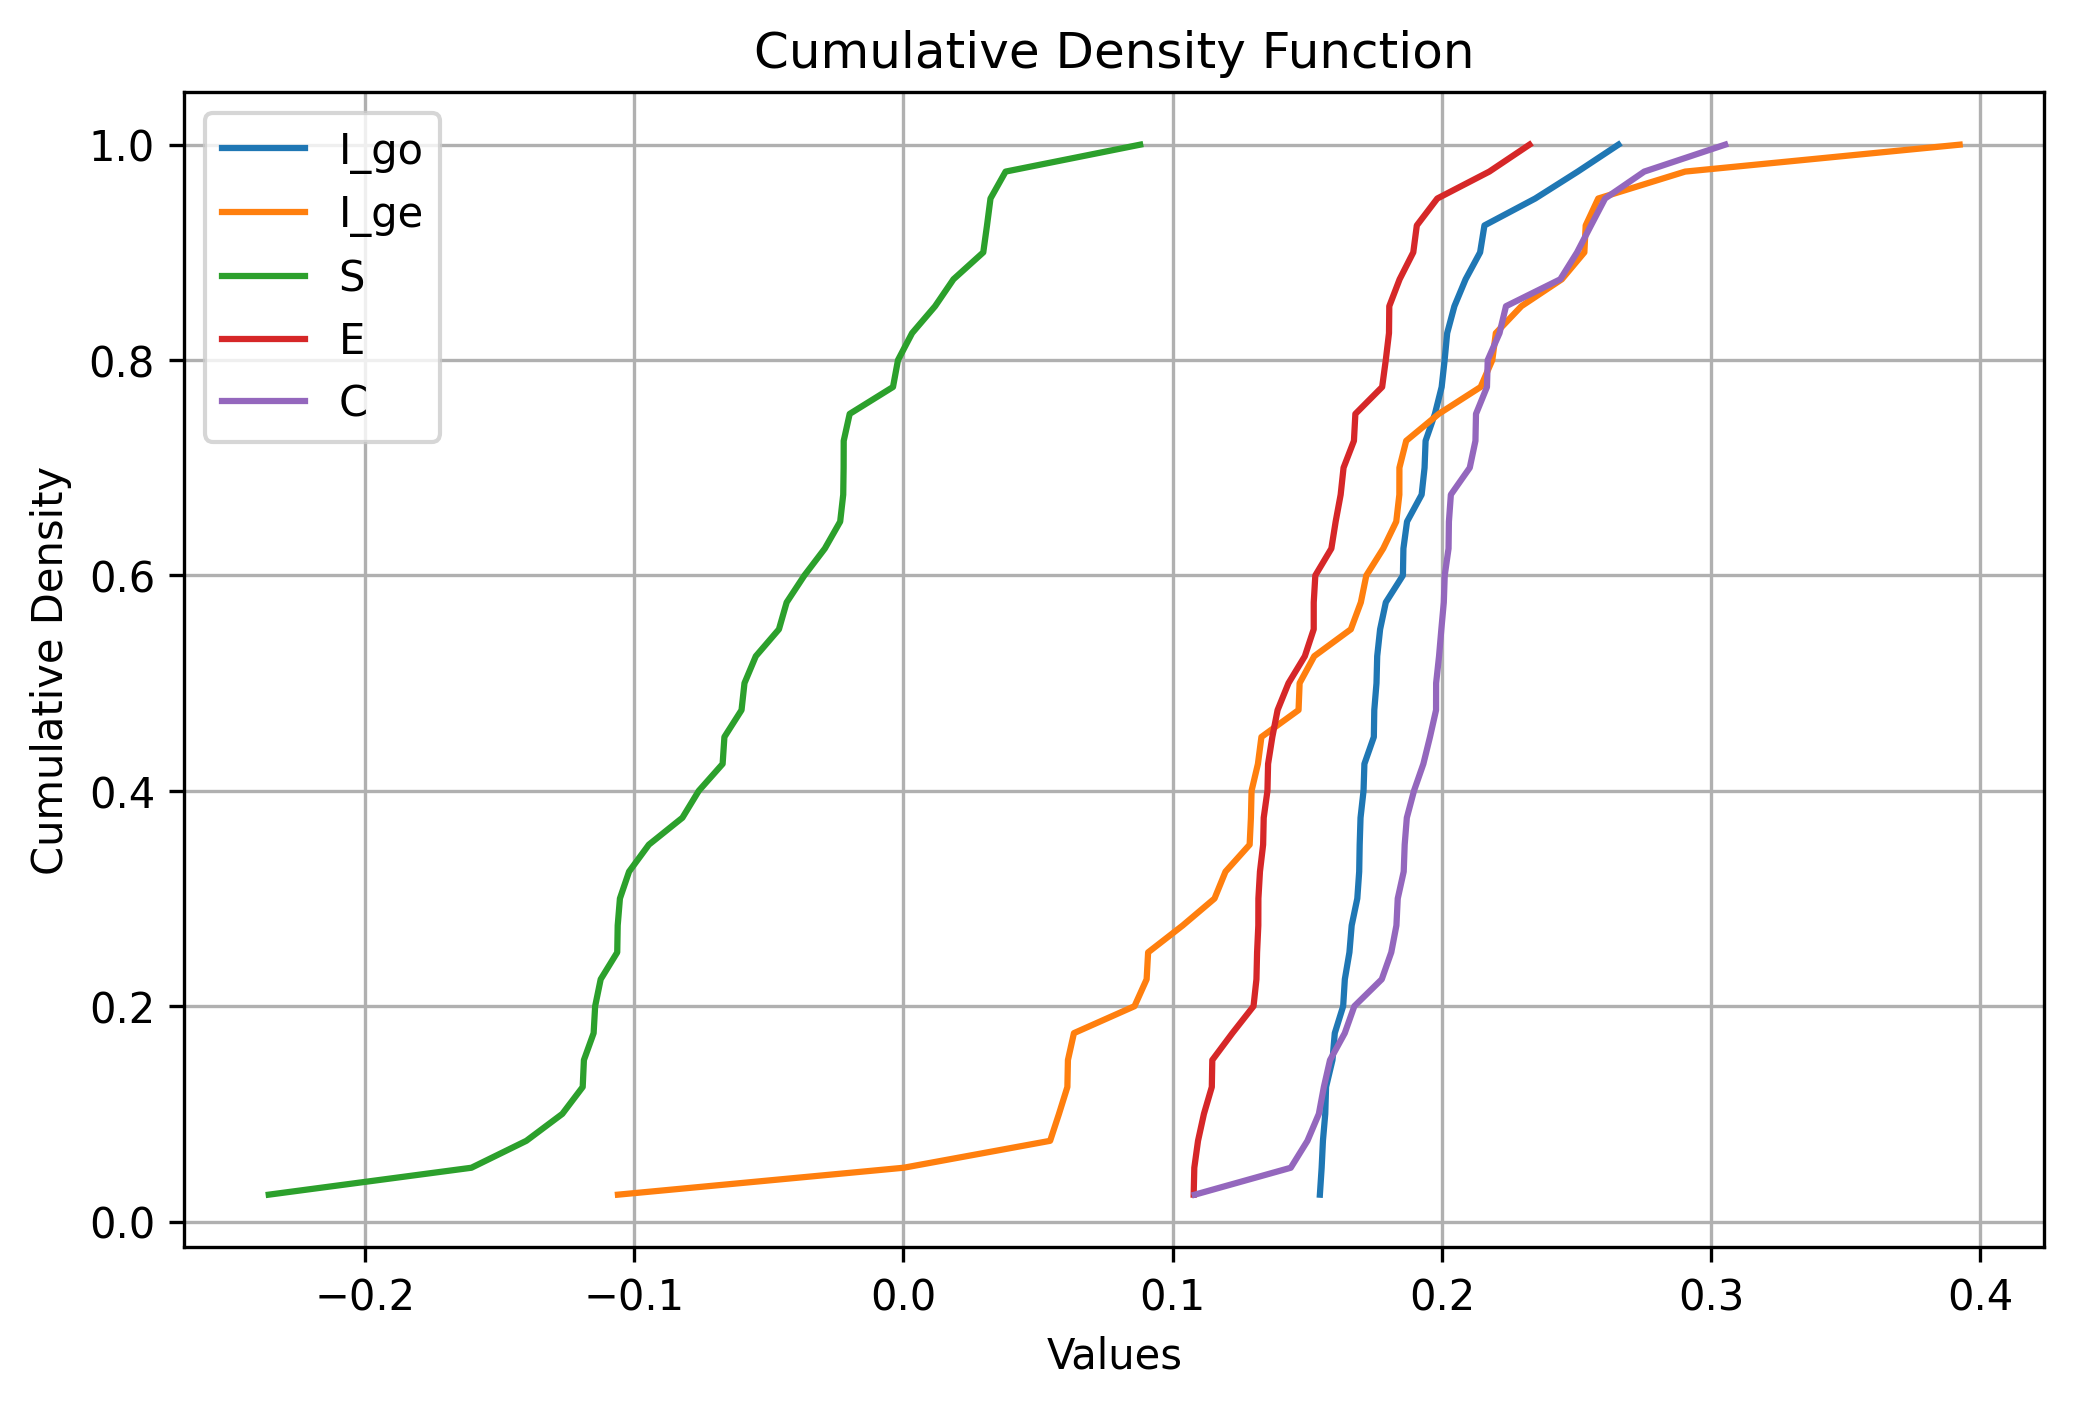

In [82]:

# Create a CDF plot for each column
plt.figure(figsize=(8, 5))

for column in top_100_genes.columns:
    values = top_100_genes[column].values
    sorted_values = np.sort(values)
    cdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
    plt.plot(sorted_values, cdf, label=column)

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Cumulative Density')
plt.title('Cumulative Density Function')
plt.legend()

# Show the plot
plt.grid()
plt.show()

## correlation values are very weak, and should not be used for analysis


In [75]:
def finding_GO_for_q_genes(met, k=100):

    top_100_genes = corr_genes_metrics_df.sort_values(by= [met], ascending=False).head(k)
    gene_names = top_100_genes.index.tolist()
    GSEA_results = sc.queries.enrich(gene_names, org="mmusculus")
    GSEA_results = GSEA_results[GSEA_results.source == "GO:BP"]
    return GSEA_results

In [76]:
GO_I_go = finding_GO_for_q_genes('I_go')
GO_I_ge = finding_GO_for_q_genes('I_ge')
GO_E = finding_GO_for_q_genes('E')
GO_S = finding_GO_for_q_genes('S')
GO_C = finding_GO_for_q_genes('C')

In [77]:
# GO_C.sort_values('p_value').head(5)

In [78]:
# import matplotlib.pyplot as plt
# import pandas as pd

# def PlotGOLabels(GO_df, met):
    
#     GO_names = GO_df.name
#     GO_p_value = -np.log(GO_df.p_value)
#     df = pd.concat([GO_p_value, GO_names], axis=1)
    
#     # Sort the DataFrame by p-values
#     df_sorted = df.sort_values('p_value').head(5)

#     # Create the horizontal box plot
#     plt.figure(figsize=(10, 9))
#     plt.barh(range(len(df_sorted)), df_sorted['p_value'], align='center', color='orange')
#     plt.yticks(range(len(df_sorted)), df_sorted['name'], fontsize="10",)
#     plt.xlabel('- log(P-value)')
#     plt.ylabel(' Functions Names')
#     plt.title(met)
#     plt.tight_layout()
#     plt.rcParams["figure.dpi"] = 300

#     # plt.subplots_adjust(left=0.9, right=0.1, top=0.5, bottom=0.1)

#     # Display the plot
#     plt.show()
    
# PlotGOLabels(GO_I_go, "I_go (a)")
# PlotGOLabels(GO_I_ge, "I_ge (b)")
# PlotGOLabels(GO_E, "E (c)")
# PlotGOLabels(GO_S, "S (d)")
# PlotGOLabels(GO_C, "C (e)")

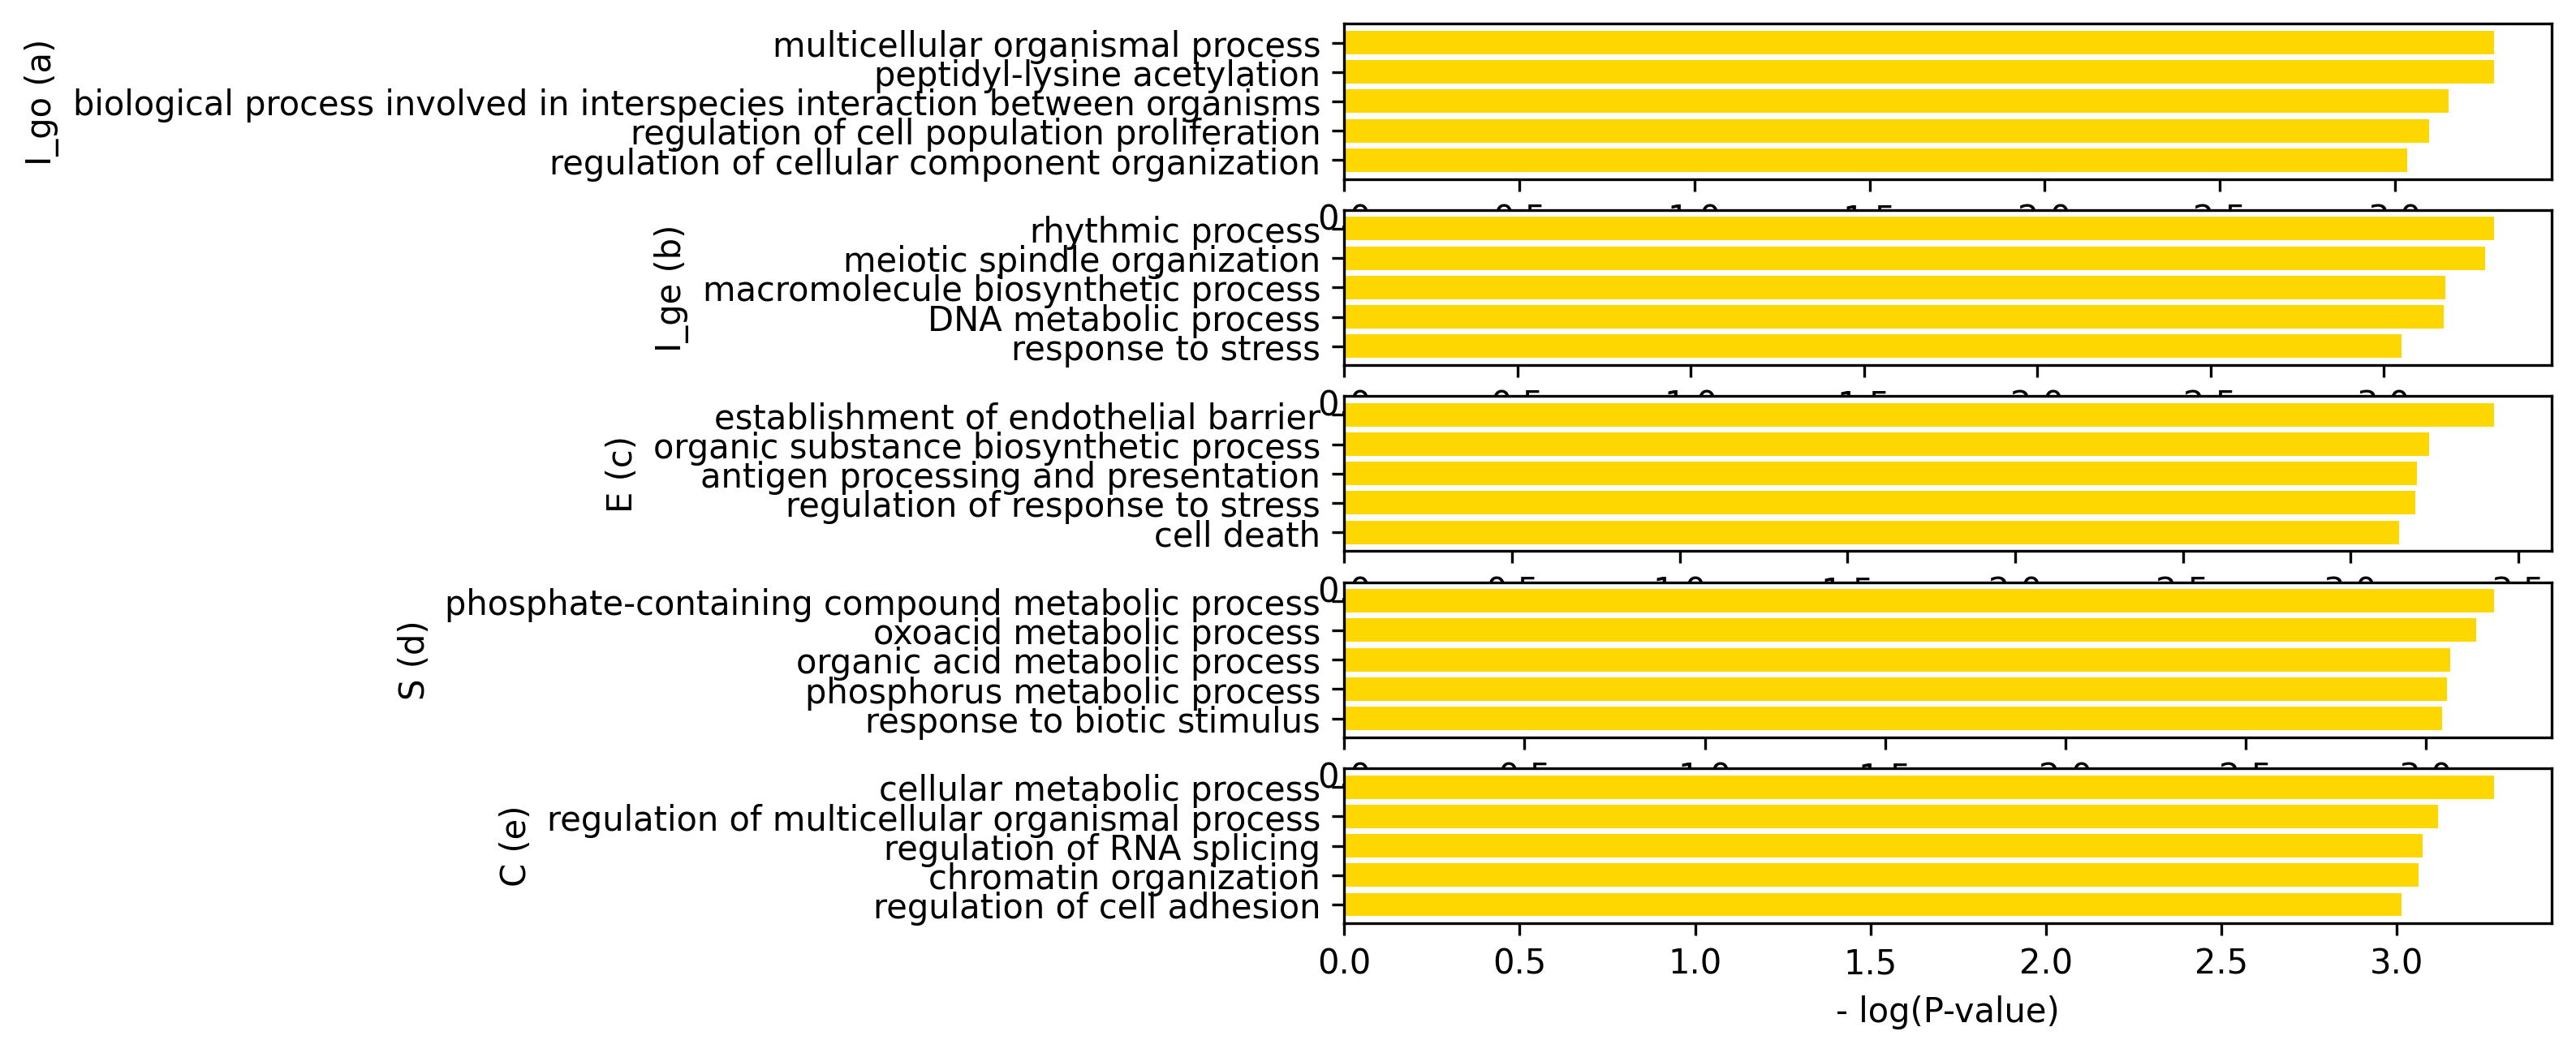

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import gridspec

def PlotGOLabels(GO_df, met, ax, subplot_position):
    GO_names = GO_df.name
    GO_p_value = -np.log(GO_df.p_value)
    df = pd.concat([GO_p_value, GO_names], axis=1)

    # Sort the DataFrame by p-values
    df_sorted = df.sort_values('p_value')
    df_sorted_top = df_sorted.head(5)

    # Plot the graph in the specified subplot position
    ax[subplot_position].barh(range(len(df_sorted_top)), df_sorted_top['p_value'], align='center', color='gold')
    ax[subplot_position].set_yticks(range(len(df_sorted_top)))
    ax[subplot_position].set_yticklabels(df_sorted_top['name'], fontsize="10")
    ax[subplot_position].set_xlabel('- log(P-value)')
    ax[subplot_position].set_ylabel(met)
    # ax[subplot_position].set_ylabel('Functions Names')
    # ax[subplot_position].set_title(met)
    
fig, ax = plt.subplots(5)

PlotGOLabels(GO_I_go, "I_go (a)", ax, 0)
PlotGOLabels(GO_I_ge, "I_ge (b)", ax, 1)
PlotGOLabels(GO_E, "E (c)", ax, 2)
PlotGOLabels(GO_S, "S (d)", ax, 3)
PlotGOLabels(GO_C, "C (e)", ax, 4)

